Ini Adalah Tahapan Dalam Menjalankan Analisis Sentimen Melalui **SVM**

### Unduh Package

In [1]:
from google.colab import drive
from IPython.display import display
import pandas as pd
import os
import glob
#!pip install wordcloud

In [2]:
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Folder skripsi/sentimen-saham/Data Penelitian'
#bisa diubah ke file path tertentu

Mounted at /content/drive


### Memanggil Data


In [3]:
# List semua file dalam folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Loop untuk membaca semua CSV
dfs = {f: pd.read_csv(os.path.join(folder_path, f)) for f in files}

# Mengakses dan menampilkan dataframe
for name, df in dfs.items():
    print(f"File: {name}, Shape: {df.shape}")

File: 20feb25.csv, Shape: (102, 15)
File: 19feb25.csv, Shape: (54, 15)
File: 01feb25.csv, Shape: (24, 15)
File: 24feb25.csv, Shape: (97, 15)
File: 23feb25.csv, Shape: (14, 15)
File: 21feb25.csv, Shape: (39, 15)
File: 22feb25.csv, Shape: (19, 15)
File: 02feb25.csv, Shape: (23, 15)
File: 03feb25.csv, Shape: (45, 15)
File: 04feb25.csv, Shape: (39, 15)
File: 05feb25.csv, Shape: (40, 15)
File: 06feb25.csv, Shape: (42, 15)
File: 07feb25.csv, Shape: (30, 15)
File: 08feb25.csv, Shape: (16, 15)
File: 09feb25.csv, Shape: (16, 15)
File: 10feb25.csv, Shape: (31, 15)
File: 11feb25.csv, Shape: (38, 15)
File: 12feb25.csv, Shape: (50, 15)
File: 13feb25.csv, Shape: (27, 15)
File: 14feb25.csv, Shape: (57, 15)
File: 15feb25.csv, Shape: (5, 15)
File: 16feb25.csv, Shape: (19, 15)
File: 17feb25.csv, Shape: (63, 15)
File: 25feb25.csv, Shape: (48, 15)
File: 26feb25.csv, Shape: (52, 15)
File: 27feb25.csv, Shape: (99, 15)
File: 28feb25.csv, Shape: (136, 15)
File: 18feb25.csv, Shape: (35, 40)


### Membersihkan Data dan Menggabungkannya

In [4]:
all_files = glob.glob(os.path.join(folder_path, "*.csv"))  # Ambil semua file CSV
df_list = [pd.read_csv(file) for file in all_files]  # Baca semua CSV ke dalam list DataFrame
df = pd.concat(df_list, ignore_index=True)  # Gabungkan semua DataFrame

In [5]:
display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,media_3_thumbnail,media_3_type,media_3_url,name,original_tweet_url,original_tweet_id,user_id,views_count,collected_at,input_url
0,1.892579e+18,Thu Feb 20 14:17:52 +0000 2025,0.0,BBRI Makin Turun Peluang atau Ancaman? https:/...,1.892579e+18,NaN,NaN,in,"Bogor, Jawa Barat",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.892562e+18,Thu Feb 20 13:10:00 +0000 2025,0.0,Dikepung Tren Pelemahan dan Rencana Buyback Be...,1.892562e+18,NaN,NaN,in,Jakarta Capital Region,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.892375e+18,Thu Feb 20 13:04:25 +0000 2025,0.0,@KompasTV Blom launching aja saham bbri sdh me...,1.892561e+18,NaN,KompasTV,in,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.892561e+18,Thu Feb 20 13:04:10 +0000 2025,0.0,menyala bbri ku,1.892561e+18,NaN,NaN,in,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.892556e+18,Thu Feb 20 12:46:06 +0000 2025,0.0,SAHAM BBRI ANCUR LAGI.!! SKEMA KASUS INI YANG ...,1.892556e+18,NaN,NaN,in,JAWA TENGAH-INDONESIA,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   conversation_id_str         1225 non-null   float64
 1   created_at                  1255 non-null   object 
 2   favorite_count              1225 non-null   float64
 3   full_text                   1255 non-null   object 
 4   id_str                      1225 non-null   float64
 5   image_url                   266 non-null    object 
 6   in_reply_to_screen_name     487 non-null    object 
 7   lang                        1225 non-null   object 
 8   location                    730 non-null    object 
 9   quote_count                 1255 non-null   float64
 10  reply_count                 1255 non-null   float64
 11  retweet_count               1255 non-null   float64
 12  tweet_url                   1255 non-null   object 
 13  user_id_str                 1225 

In [7]:
df = df[['created_at', 'full_text']]  # Memanggil kolom yang diinginkan menjadi dataframe sendiri


In [8]:
display(df)

,created_at,full_text
0,Thu Feb 20 14:17:52 +0000 2025,BBRI Makin Turun Peluang atau Ancaman? https:/...
1,Thu Feb 20 13:10:00 +0000 2025,Dikepung Tren Pelemahan dan Rencana Buyback Be...
2,Thu Feb 20 13:04:25 +0000 2025,@KompasTV Blom launching aja saham bbri sdh me...
3,Thu Feb 20 13:04:10 +0000 2025,menyala bbri ku
4,Thu Feb 20 12:46:06 +0000 2025,SAHAM BBRI ANCUR LAGI.!! SKEMA KASUS INI YANG ...
...,...,...
1255,NaN,NaN
1256,NaN,NaN
1257,NaN,NaN
1258,NaN,NaN


In [9]:
# Pastikan kolom 'created_at' dalam format datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Urutkan berdasarkan tanggal dari yang paling lama ke terbaru
df = df.sort_values(by='created_at', ascending=True)

# Reset index agar rapih setelah pengurutan
df = df.reset_index(drop=True)

# Cek hasil
df.head()  # Menampilkan 5 data pertama




/tmp/ipython-input-9-676499784.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


,created_at,full_text
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin I...
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bb...
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E ...
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly cha...


In [10]:
# Menghapus data kosong
df = df.dropna()
bbri_df = df.sort_values(by='created_at', ascending=True)
print(bbri_df)

                    created_at  \
0    2025-02-01 01:56:24+00:00   
1    2025-02-01 02:16:00+00:00   
2    2025-02-01 02:38:12+00:00   
3    2025-02-01 02:46:09+00:00   
4    2025-02-01 02:58:44+00:00   
...                        ...   
1250 2025-02-28 21:18:18+00:00   
1251 2025-02-28 22:38:32+00:00   
1252 2025-02-28 22:41:15+00:00   
1253 2025-02-28 23:23:33+00:00   
1254 2025-02-28 23:55:59+00:00   

                                              full_text  
0     @EvaMalca @valentrywandi Emang dia yg ajarin I...  
1                           Habis ini akan borong BBRI   
2     @marvelle_danny @valentrywandi kenapa harus bb...  
3     Saham $BBRI saat ini memiliki nilai rasio P/E ...  
4     Mengapa harus ragu? Secara teknikal weekly cha...  
...                                                 ...  
1250  @FLCKR_ID @imsanto71 @me_iwan @StefanAntonio__...  
1251  #0017: portofolio warteg saham BY JO ot B: 28/...  
1252  Udah diniatin mau beli bbri tapi entah tiap ma...  
1253  BERIT

Berikutnya adalah Tahapan Preprocessing, Fungsinya adalah mempersiapkan data dalam bentuk yang sesuai untuk analisis sentimen

## Case Folding


In [13]:
# Ubah seluruh teks menjadi huruf kecil (case folding)
bbri_df['text_casefolded'] = bbri_df['full_text'].str.lower()
display(bbri_df)

,created_at,full_text,text_casefolded
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa
...,...,...,...
1250,2025-02-28 21:18:18+00:00,@FLCKR_ID @imsanto71 @me_iwan @StefanAntonio__ @MasBroJowoNKRI BCA turunnya lebih slow. Kalo BBRI kemarin turun 7% dalam sehari,@flckr_id @imsanto71 @me_iwan @stefanantonio__ @masbrojowonkri bca turunnya lebih slow. kalo bbri kemarin turun 7% dalam sehari
1251,2025-02-28 22:38:32+00:00,#0017: portofolio warteg saham BY JO ot B: 28/02/2025: McopeetS bbri dssa: simak CUTE pada hasil transaksi McS bbri: (laporan lengkap portofolio menunggu validasi broker sekuritas ot B): https://t.co/W2o7dAMbpD,#0017: portofolio warteg saham by jo ot b: 28/02/2025: mcopeets bbri dssa: simak cute pada hasil transaksi mcs bbri: (laporan lengkap portofolio menunggu validasi broker sekuritas ot b): https://t.co/w2o7dambpd
1252,2025-02-28 22:41:15+00:00,Udah diniatin mau beli bbri tapi entah tiap mau beli rasanya berat banget wkwkwk maybe it's a sign from the universe,udah diniatin mau beli bbri tapi entah tiap mau beli rasanya berat banget wkwkwk maybe it's a sign from the universe
1253,2025-02-28 23:23:33+00:00,BERITA POPULER: Dividen BBRI hingga Koreksi Besar Harga Emas Antam (ANTM) #saham #emas #investasi https://t.co/WtSphzHZkX,berita populer: dividen bbri hingga koreksi besar harga emas antam (antm) #saham #emas #investasi https://t.co/wtsphzhzkx


In [14]:
# Membaca semua teks dalam tabel
pd.set_option('display.max_colwidth', None)
display(bbri_df)

,created_at,full_text,text_casefolded
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa
...,...,...,...
1250,2025-02-28 21:18:18+00:00,@FLCKR_ID @imsanto71 @me_iwan @StefanAntonio__ @MasBroJowoNKRI BCA turunnya lebih slow. Kalo BBRI kemarin turun 7% dalam sehari,@flckr_id @imsanto71 @me_iwan @stefanantonio__ @masbrojowonkri bca turunnya lebih slow. kalo bbri kemarin turun 7% dalam sehari
1251,2025-02-28 22:38:32+00:00,#0017: portofolio warteg saham BY JO ot B: 28/02/2025: McopeetS bbri dssa: simak CUTE pada hasil transaksi McS bbri: (laporan lengkap portofolio menunggu validasi broker sekuritas ot B): https://t.co/W2o7dAMbpD,#0017: portofolio warteg saham by jo ot b: 28/02/2025: mcopeets bbri dssa: simak cute pada hasil transaksi mcs bbri: (laporan lengkap portofolio menunggu validasi broker sekuritas ot b): https://t.co/w2o7dambpd
1252,2025-02-28 22:41:15+00:00,Udah diniatin mau beli bbri tapi entah tiap mau beli rasanya berat banget wkwkwk maybe it's a sign from the universe,udah diniatin mau beli bbri tapi entah tiap mau beli rasanya berat banget wkwkwk maybe it's a sign from the universe
1253,2025-02-28 23:23:33+00:00,BERITA POPULER: Dividen BBRI hingga Koreksi Besar Harga Emas Antam (ANTM) #saham #emas #investasi https://t.co/WtSphzHZkX,berita populer: dividen bbri hingga koreksi besar harga emas antam (antm) #saham #emas #investasi https://t.co/wtsphzhzkx


## Text Cleaning

In [15]:
import re

# Bersihkan teks dari mention, hashtag, URL, RT, simbol, tanda baca, angka, dan spasi berlebih
def clean_text(text):
    text = re.sub(r"(@[A-Za-z0-9_]+)|(#\w+)|(http\S+)|(^rt)", "", text)   # hapus mention, hashtag, URL, dan RT
    text = re.sub(r"[^a-z\s]", "", text)                                  # hapus simbol dan tanda baca
    text = re.sub(r"\d+", "", text)                                       # hapus angka
    text = re.sub(r"\s+", " ", text).strip()                              # hapus spasi berlebih
    return text

# Terapkan cleaning pada teks yang sudah case folding
bbri_df['text_clean'] = bbri_df['text_casefolded'].apply(clean_text)
display(bbri_df)


,created_at,full_text,text_casefolded,text_clean
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi
...,...,...,...,...
1250,2025-02-28 21:18:18+00:00,@FLCKR_ID @imsanto71 @me_iwan @StefanAntonio__ @MasBroJowoNKRI BCA turunnya lebih slow. Kalo BBRI kemarin turun 7% dalam sehari,@flckr_id @imsanto71 @me_iwan @stefanantonio__ @masbrojowonkri bca turunnya lebih slow. kalo bbri kemarin turun 7% dalam sehari,bca turunnya lebih slow kalo bbri kemarin turun dalam sehari
1251,2025-02-28 22:38:32+00:00,#0017: portofolio warteg saham BY JO ot B: 28/02/2025: McopeetS bbri dssa: simak CUTE pada hasil transaksi McS bbri: (laporan lengkap portofolio menunggu validasi broker sekuritas ot B): https://t.co/W2o7dAMbpD,#0017: portofolio warteg saham by jo ot b: 28/02/2025: mcopeets bbri dssa: simak cute pada hasil transaksi mcs bbri: (laporan lengkap portofolio menunggu validasi broker sekuritas ot b): https://t.co/w2o7dambpd,portofolio warteg saham by jo ot b mcopeets bbri dssa simak cute pada hasil transaksi mcs bbri laporan lengkap portofolio menunggu validasi broker sekuritas ot b
1252,2025-02-28 22:41:15+00:00,Udah diniatin mau beli bbri tapi entah tiap mau beli rasanya berat banget wkwkwk maybe it's a sign from the universe,udah diniatin mau beli bbri tapi entah tiap mau beli rasanya berat banget wkwkwk maybe it's a sign from the universe,udah diniatin mau beli bbri tapi entah tiap mau beli rasanya berat banget wkwkwk maybe its a sign from the universe
1253,2025-02-28 23:23:33+00:00,BERITA POPULER: Dividen BBRI hingga Koreksi Besar Harga Emas Antam (ANTM) #saham #emas #investasi https://t.co/WtSphzHZkX,berita populer: dividen bbri hingga koreksi besar harga emas antam (antm) #saham #emas #investasi https://t.co/wtsphzhzkx,berita populer dividen bbri hingga koreksi besar harga emas antam antm


## Tokenizing

tokenizing menggunakan libaray NLP bernama NLTK (Natural Language ToolKit)

In [16]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab dataset
from nltk.tokenize import sent_tokenize, word_tokenize
bbri_df['text_tokens'] = bbri_df['text_clean'].apply(lambda x: word_tokenize(x))
bbri_df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,created_at,full_text,text_casefolded,text_clean,text_tokens
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]"
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]"
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]"
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]"
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]"


## Normalisasi

In [17]:
# Fungsi untuk normalisasi
def normalize_text(tokens, normalization_dict):
    return [normalization_dict.get(word, word) for word in tokens]

# Memanggil Kamus yang sudah tersimpan
colloquial_dict_path = '/content/drive/MyDrive/Folder skripsi/Script/colloquial-indonesian-lexicon.csv'

# Mengubah menjadi dataframe dengan dua kolom "slang" dan "baku"
colloquial_df = pd.read_csv(colloquial_dict_path)

# Membuat kamus dari dataframe
normalization_dict = dict(zip(colloquial_df['slang'], colloquial_df['formal']))

# Mengaplikasikan teks Normalisasi
bbri_df['text_normalized'] = bbri_df['text_tokens'].apply(lambda tokens: normalize_text(tokens, normalization_dict))

bbri_df.head()

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]","[memang, dia, yang, ajarkan, ikan, sepat, ikan, lele, masih, nyangkut, bbri, boleh]"
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]","[habis, ini, akan, borong, bbri]"
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]","[kenapa, harus, bbri, padahal, ada, saham, lain]"
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]"
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, juga, masih, good, value, dibanding, beberapa, bank, lain, semoga, jadi, katalist, yang, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]"


## Stopword Removal

In [21]:
# Mengunduh Package Sastrawi
!pip install Sastrawi


In [22]:
# Memanggil Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Stopword dari Sastrawi saja (tanpa custom)
factory = StopWordRemoverFactory()
stopwords_sastrawi = set(factory.get_stop_words())

# Fungsi untuk menghapus stopword
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords_sastrawi]

# Terapkan ke data
bbri_df['text_stopword'] = bbri_df['text_normalized'].apply(remove_stopwords)

# Tampilkan hasil
bbri_df.head()

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]","[memang, dia, yang, ajarkan, ikan, sepat, ikan, lele, masih, nyangkut, bbri, boleh]","[memang, ajarkan, ikan, sepat, ikan, lele, nyangkut, bbri]"
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]","[habis, ini, akan, borong, bbri]","[habis, borong, bbri]"
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]","[kenapa, harus, bbri, padahal, ada, saham, lain]","[bbri, padahal, saham]"
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, memiliki, nilai, rasio, pe, sangat, rendah, tahun, terakhir, saatnya, beli]"
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, juga, masih, good, value, dibanding, beberapa, bank, lain, semoga, jadi, katalist, yang, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[ragu, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, good, value, dibanding, beberapa, bank, semoga, jadi, katalist, baik, mempercepat, proses, bbri, balik, kepala]"


## Stemming

In [23]:
# Sastrawi Untuk Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Mengubah setiap kata dengan sastrawi
def stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

bbri_df['text_stemmed'] = bbri_df['text_stopword'].apply(stemming)

bbri_df.head()

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]","[memang, dia, yang, ajarkan, ikan, sepat, ikan, lele, masih, nyangkut, bbri, boleh]","[memang, ajarkan, ikan, sepat, ikan, lele, nyangkut, bbri]","[memang, ajar, ikan, sepat, ikan, lele, nyangkut, bbri]"
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]","[habis, ini, akan, borong, bbri]","[habis, borong, bbri]","[habis, borong, bbri]"
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]","[kenapa, harus, bbri, padahal, ada, saham, lain]","[bbri, padahal, saham]","[bbri, padahal, saham]"
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, memiliki, nilai, rasio, pe, sangat, rendah, tahun, terakhir, saatnya, beli]","[saham, bbri, milik, nilai, rasio, pe, sangat, rendah, tahun, akhir, saat, beli]"
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, juga, masih, good, value, dibanding, beberapa, bank, lain, semoga, jadi, katalist, yang, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[ragu, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, good, value, dibanding, beberapa, bank, semoga, jadi, katalist, baik, mempercepat, proses, bbri, balik, kepala]","[ragu, teknikal, weekly, chart, bakal, rebound, nih, pe, ratio, good, value, banding, beberapa, bank, moga, jadi, katalist, baik, cepat, proses, bbri, balik, kepala]"


Setelah itu adalah Memviasualisasikan untuk melihat jumlah mayoritas kata

## Wordcloud

Untuk melihat kata terbanyak dengan menggunakan wordcloud

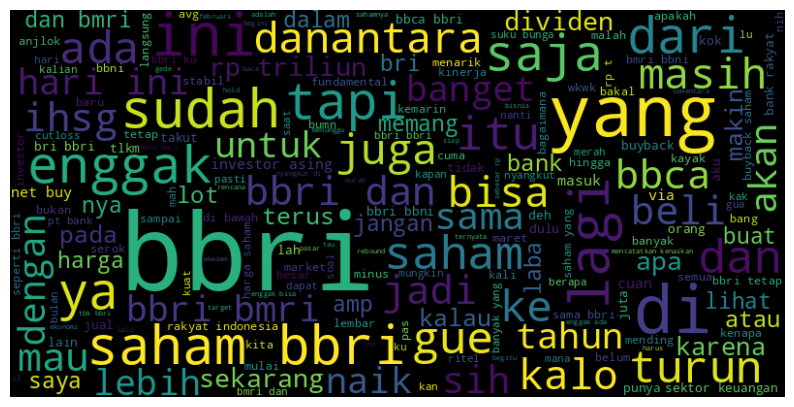

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks yang sudah di-stemming menjadi satu string
all_words = ' '.join([text for text in bbri_df['text_normalized'].apply(lambda x: ' '.join(x))])

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words)

# Tampilkan WordCloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Frekuensi Kata

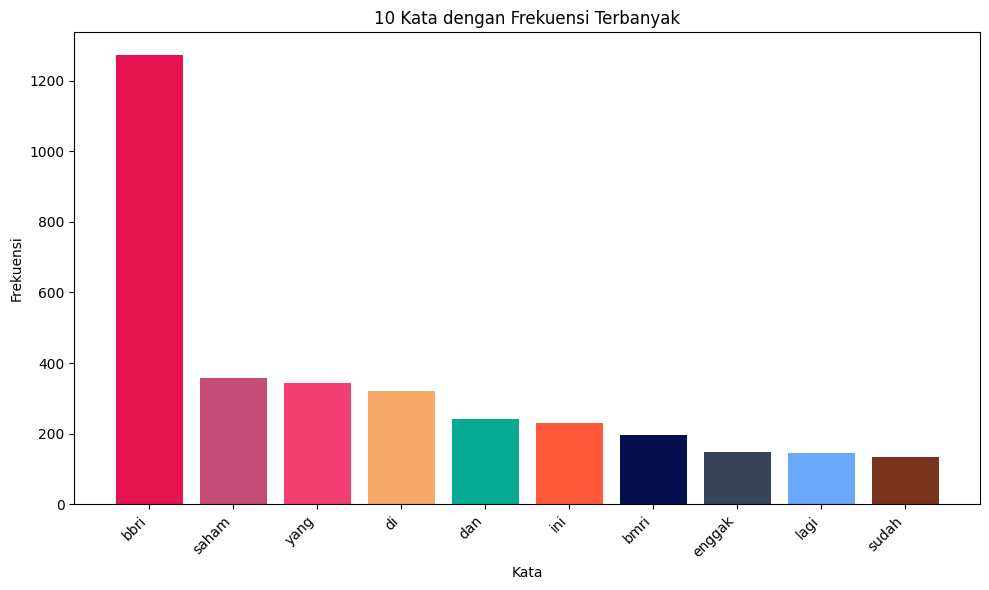

In [42]:
from collections import Counter
import matplotlib.pyplot as plt
import random

# Gabungkan semua list token hasil stemming
all_stemmed_tokens = [token for sublist in bbri_df['text_normalized'] for token in sublist]

# Hitung frekuensi kata
word_counts = Counter(all_stemmed_tokens)

# Ambil 10 kata teratas
top_10_words = word_counts.most_common(10)

# Pisahkan kata dan frekuensinya
words, counts = zip(*top_10_words)

# Buat daftar warna acak
colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range(len(words))]

# Buat bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color=colors)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('10 Kata dengan Frekuensi Terbanyak')
plt.xticks(rotation=45, ha='right') # Rotasi label x agar tidak tumpang tindih
plt.tight_layout() # Menyesuaikan layout
plt.show()

In [43]:
bbri_df.head(30)

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]","[memang, dia, yang, ajarkan, ikan, sepat, ikan, lele, masih, nyangkut, bbri, boleh]","[memang, ajarkan, ikan, sepat, ikan, lele, nyangkut, bbri]","[memang, ajar, ikan, sepat, ikan, lele, nyangkut, bbri]"
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]","[habis, ini, akan, borong, bbri]","[habis, borong, bbri]","[habis, borong, bbri]"
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]","[kenapa, harus, bbri, padahal, ada, saham, lain]","[bbri, padahal, saham]","[bbri, padahal, saham]"
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, memiliki, nilai, rasio, pe, sangat, rendah, tahun, terakhir, saatnya, beli]","[saham, bbri, milik, nilai, rasio, pe, sangat, rendah, tahun, akhir, saat, beli]"
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, juga, masih, good, value, dibanding, beberapa, bank, lain, semoga, jadi, katalist, yang, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[ragu, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, good, value, dibanding, beberapa, bank, semoga, jadi, katalist, baik, mempercepat, proses, bbri, balik, kepala]","[ragu, teknikal, weekly, chart, bakal, rebound, nih, pe, ratio, good, value, banding, beberapa, bank, moga, jadi, katalist, baik, cepat, proses, bbri, balik, kepala]"
5,2025-02-01 03:34:05+00:00,sudah waktunya bbri ath,sudah waktunya bbri ath,sudah waktunya bbri ath,"[sudah, waktunya, bbri, ath]","[sudah, waktunya, bbri, ath]","[waktunya, bbri, ath]","[waktu, bbri, ath]"
6,2025-02-01 03:49:57+00:00,@doktermarket BBCA juga lagi dikasih masuk. Saat banyak yang tebar fear (seperti BBRI lalu) berarti waktunya cicil masuk,@doktermarket bbca juga lagi dikasih masuk. saat banyak yang tebar fear (sep

In [44]:
# Menyimpan hasilnya Pre
bbri_df.to_csv('/content/drive/MyDrive/Folder skripsi/Script/bbri_pre.csv', index=False)
print("bbri_df saved successfully to '/content/drive/MyDrive/Folder skripsi/Script/.csv'")

bbri_df saved successfully to '/content/drive/MyDrive/Folder skripsi/Script/.csv'


In [45]:
bbri_sentimen = pd.read_csv('/content/drive/MyDrive/Folder skripsi/sentimen-saham/Label/bbri_sentimen.csv')
bbri_sentimen.head(30)


,created_at,full_text,sentimen
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,negatif
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,positif
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,negatif
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,netral
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,positif
5,2025-02-01 03:34:05+00:00,sudah waktunya bbri ath,positif
6,2025-02-01 03:49:57+00:00,@doktermarket BBCA juga lagi dikasih masuk. Saat banyak yang tebar fear (seperti BBRI lalu) berarti waktunya cicil masuk,positif
7,2025-02-01 04:20:17+00:00,BBRI trades at 1.9x PB 25CL with 8% div yield. Valuasi sudah super murah wajar diusulkan buat BUYBACK Channel https://t.co/xBidHQEGRD https://t.co/O8Cw0F8Ehu,netral
8,2025-02-01 04:49:25+00:00,PT Bank Rakyat Indonesia (Persero) Tbk (BBRI) menghapus kredit macet senilai Rp71 triliun terutama dari debitur sektor Usaha Mikro Kecil dan Menengah (UMKM). Baca selengkapnya: https://t.co/h2YG2jCoMf : IDNFinancials https://t.co/ueoPhQg61O,netral
9,2025-02-01 04:57:07+00:00,@EvaMalca @valentrywandi Bbri nyangkut saham lain invest,negatif


In [46]:
bbri_sentimen.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  1255 non-null   object
 1   full_text   1255 non-null   object
 2   sentimen    1255 non-null   object
dtypes: object(3)
memory usage: 29.5+ KB


In [47]:
# Menggabungkan bbri_df dengan bbri_sentimen berdasarkan index
# Asumsi bbri_sentimen memiliki index yang sama dengan bbri_df setelah preprocessing

# Pastikan kedua DataFrames memiliki jumlah baris yang sama
if len(bbri_df) == len(bbri_sentimen):
  bbri_df_merged = pd.concat([bbri_df, bbri_sentimen['sentimen']], axis=1)
  display(bbri_df_merged)
else:
  print("Jumlah baris pada bbri_df dan bbri_sentimen tidak sama, tidak dapat menggabungkan.")

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed,sentimen
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]","[memang, dia, yang, ajarkan, ikan, sepat, ikan, lele, masih, nyangkut, bbri, boleh]","[memang, ajarkan, ikan, sepat, ikan, lele, nyangkut, bbri]","[memang, ajar, ikan, sepat, ikan, lele, nyangkut, bbri]",negatif
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]","[habis, ini, akan, borong, bbri]","[habis, borong, bbri]","[habis, borong, bbri]",positif
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]","[kenapa, harus, bbri, padahal, ada, saham, lain]","[bbri, padahal, saham]","[bbri, padahal, saham]",negatif
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, memiliki, nilai, rasio, pe, sangat, rendah, tahun, terakhir, saatnya, beli]","[saham, bbri, milik, nilai, rasio, pe, sangat, rendah, tahun, akhir, saat, beli]",netral
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, juga, masih, good, value, dibanding, beberapa, bank, lain, semoga, jadi, katalist, yang, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[ragu, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, good, value, dibanding, beberapa, bank, semoga, jadi, katalist, baik, mempercepat, proses, bbri, balik, kepala]","[ragu, teknikal, weekly, chart, bakal, rebound, nih, pe, ratio, good, value, banding, beberapa, bank, moga, jadi, katalist, baik, cepat, proses, bbri, balik, kepala]",positif
...,...,...,...,...,...,...,...,...,...
1250,2025-02-28 21:18:18+00:00,@FLCKR_ID @imsanto71 @me_iwan @StefanAntonio__ @MasBroJowoNKRI BCA turunnya lebih slow. Kalo BBRI kemarin turun 7% dalam sehari,@flckr_id @imsanto71 @me_iwan @stefanantonio__ @masbrojowonkri bca turunnya lebih slow. kalo bbri kemarin turun 7% dalam sehari,bca turunnya lebih slow kalo bbri kemarin turun dalam seh

In [48]:
# Buang baris dengan nilai 'tidak berguna' di kolom 'sentimen'
bbri_df_merged = bbri_df_merged[bbri_df_merged['sentimen'] != 'tidak berguna']
bbri_df_merged = bbri_df_merged.reset_index(drop=True)
display(bbri_df_merged)


,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed,sentimen
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]","[memang, dia, yang, ajarkan, ikan, sepat, ikan, lele, masih, nyangkut, bbri, boleh]","[memang, ajarkan, ikan, sepat, ikan, lele, nyangkut, bbri]","[memang, ajar, ikan, sepat, ikan, lele, nyangkut, bbri]",negatif
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]","[habis, ini, akan, borong, bbri]","[habis, borong, bbri]","[habis, borong, bbri]",positif
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]","[kenapa, harus, bbri, padahal, ada, saham, lain]","[bbri, padahal, saham]","[bbri, padahal, saham]",negatif
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, memiliki, nilai, rasio, pe, sangat, rendah, tahun, terakhir, saatnya, beli]","[saham, bbri, milik, nilai, rasio, pe, sangat, rendah, tahun, akhir, saat, beli]",netral
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, juga, masih, good, value, dibanding, beberapa, bank, lain, semoga, jadi, katalist, yang, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[ragu, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, good, value, dibanding, beberapa, bank, semoga, jadi, katalist, baik, mempercepat, proses, bbri, balik, kepala]","[ragu, teknikal, weekly, chart, bakal, rebound, nih, pe, ratio, good, value, banding, beberapa, bank, moga, jadi, katalist, baik, cepat, proses, bbri, balik, kepala]",positif
...,...,...,...,...,...,...,...,...,...
1221,2025-02-28 21:18:18+00:00,@FLCKR_ID @imsanto71 @me_iwan @StefanAntonio__ @MasBroJowoNKRI BCA turunnya lebih slow. Kalo BBRI kemarin turun 7% dalam sehari,@flckr_id @imsanto71 @me_iwan @stefanantonio__ @masbrojowonkri bca turunnya lebih slow. kalo bbri kemarin turun 7% dalam sehari,bca turunnya lebih slow kalo bbri kemarin turun dalam seh

In [49]:
bbri_df_merged['text_stemmed_str'] = bbri_df_merged['text_stemmed'].apply(lambda x: ' '.join(x))
display(bbri_df_merged)


,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed,sentimen,text_stemmed_str
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"[emang, dia, yg, ajarin, ikan, sepat, ikan, lele, masih, nyangkut, bbri, le]","[memang, dia, yang, ajarkan, ikan, sepat, ikan, lele, masih, nyangkut, bbri, boleh]","[memang, ajarkan, ikan, sepat, ikan, lele, nyangkut, bbri]","[memang, ajar, ikan, sepat, ikan, lele, nyangkut, bbri]",negatif,memang ajar ikan sepat ikan lele nyangkut bbri
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"[habis, ini, akan, borong, bbri]","[habis, ini, akan, borong, bbri]","[habis, borong, bbri]","[habis, borong, bbri]",positif,habis borong bbri
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"[kenapa, harus, bbri, padahal, ada, saham, lain]","[kenapa, harus, bbri, padahal, ada, saham, lain]","[bbri, padahal, saham]","[bbri, padahal, saham]",negatif,bbri padahal saham
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, saat, ini, memiliki, nilai, rasio, pe, yang, sangat, rendah, dalam, tahun, terakhir, saatnya, beli]","[saham, bbri, memiliki, nilai, rasio, pe, sangat, rendah, tahun, terakhir, saatnya, beli]","[saham, bbri, milik, nilai, rasio, pe, sangat, rendah, tahun, akhir, saat, beli]",netral,saham bbri milik nilai rasio pe sangat rendah tahun akhir saat beli
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, jg, masih, good, value, dibanding, bbrpa, bank, lain, semoga, jadi, katalist, yg, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[mengapa, harus, ragu, secara, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, juga, masih, good, value, dibanding, beberapa, bank, lain, semoga, jadi, katalist, yang, baik, untuk, mempercepat, proses, bbri, balik, ke, kepala, lagi]","[ragu, teknikal, weekly, chart, bakalan, rebound, nih, pe, ratio, good, value, dibanding, beberapa, bank, semoga, jadi, katalist, baik, mempercepat, proses, bbri, balik, kepala]","[ragu, teknikal, weekly, chart, bakal, rebound, nih, pe, ratio, good, value, banding, beberapa, bank, moga, jadi, katalist, baik, cepat, proses, bbri, balik, kepala]",positif,ragu teknikal weekly chart bakal rebound nih pe ratio good value banding beberapa bank moga jadi katalist baik cepat proses bbri balik kepala
...,...,...,...,...,...,...,...,...,...,...
1221,2025-02-28 21:18:18+00:0

In [50]:
bbri_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   created_at        1226 non-null   datetime64[ns, UTC]
 1   full_text         1226 non-null   object             
 2   text_casefolded   1226 non-null   object             
 3   text_clean        1226 non-null   object             
 4   text_tokens       1226 non-null   object             
 5   text_normalized   1226 non-null   object             
 6   text_stopword     1226 non-null   object             
 7   text_stemmed      1226 non-null   object             
 8   sentimen          1226 non-null   object             
 9   text_stemmed_str  1226 non-null   object             
dtypes: datetime64[ns, UTC](1), object(9)
memory usage: 95.9+ KB


In [51]:
bbri_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   created_at        1226 non-null   datetime64[ns, UTC]
 1   full_text         1226 non-null   object             
 2   text_casefolded   1226 non-null   object             
 3   text_clean        1226 non-null   object             
 4   text_tokens       1226 non-null   object             
 5   text_normalized   1226 non-null   object             
 6   text_stopword     1226 non-null   object             
 7   text_stemmed      1226 non-null   object             
 8   sentimen          1226 non-null   object             
 9   text_stemmed_str  1226 non-null   object             
dtypes: datetime64[ns, UTC](1), object(9)
memory usage: 95.9+ KB


In [52]:
duplikat_df = bbri_df_merged[bbri_df_merged.duplicated('text_stemmed_str')]
duplikat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 18 to 1201
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   created_at        39 non-null     datetime64[ns, UTC]
 1   full_text         39 non-null     object             
 2   text_casefolded   39 non-null     object             
 3   text_clean        39 non-null     object             
 4   text_tokens       39 non-null     object             
 5   text_normalized   39 non-null     object             
 6   text_stopword     39 non-null     object             
 7   text_stemmed      39 non-null     object             
 8   sentimen          39 non-null     object             
 9   text_stemmed_str  39 non-null     object             
dtypes: datetime64[ns, UTC](1), object(9)
memory usage: 3.4+ KB


In [53]:
bbri_df_clean = bbri_df_merged.drop_duplicates(subset='text_stemmed_str')
bbri_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1187 entries, 0 to 1225
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   created_at        1187 non-null   datetime64[ns, UTC]
 1   full_text         1187 non-null   object             
 2   text_casefolded   1187 non-null   object             
 3   text_clean        1187 non-null   object             
 4   text_tokens       1187 non-null   object             
 5   text_normalized   1187 non-null   object             
 6   text_stopword     1187 non-null   object             
 7   text_stemmed      1187 non-null   object             
 8   sentimen          1187 non-null   object             
 9   text_stemmed_str  1187 non-null   object             
dtypes: datetime64[ns, UTC](1), object(9)
memory usage: 102.0+ KB


In [54]:
# Menyimpan hasilnya
bbri_df_clean.to_csv('/content/drive/MyDrive/Folder skripsi/Script/bbri_Pre_dan_Label.csv', index=False)
print("bbri_df saved successfully to '/content/drive/MyDrive/Folder skripsi/Script/.csv'")

bbri_df saved successfully to '/content/drive/MyDrive/Folder skripsi/Script/.csv'


In [55]:
# Jika ingin langsung ke Tahap pembangunan Model Bisa langsung run ini

# bbri_df_clean = pd.read_csv('/content/drive/MyDrive/Folder skripsi/Script/bbri_Pre_dan_Label.csv')
# bbri_df_cleam.head(30)

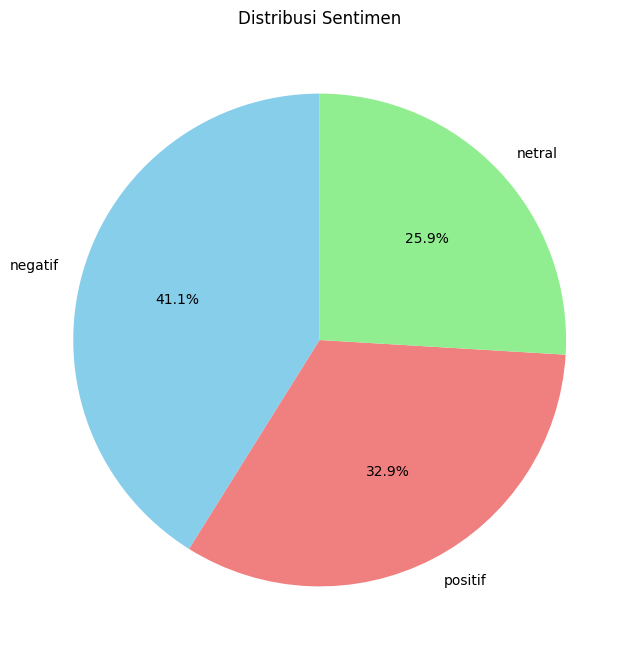

In [56]:
# Untuk Distribusi Semtimennya
import matplotlib.pyplot as plt
# Hitung jumlah sentimen positif, negatif, dan netral
sentiment_counts = bbri_df_clean['sentimen'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribusi Sentimen')
plt.show()

Selanjutnya adalah TF-IDF



## Pembangunan Model SVM

Untuk Memanggil Package dan Menjadikan data dalam Variabel

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

X = bbri_df_clean['text_stemmed'].apply(lambda x: ' '.join(x))
y = bbri_df_clean['sentimen']



In [58]:
# Pembagian data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi dan terapkan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Latih model SVM RBF
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

In [59]:
# Lakukan prediksi pada data uji
y_pred = svm_model.predict(X_test_tfidf)

# Prediksi probabilitas untuk penentuan skor
y_proba = svm_model.predict_proba(X_test_tfidf)

skor_sentimen = []
for i in range(len(y_pred)):
    if y_pred[i] == 'positif':
        skor_sentimen.append(+y_proba[i][2])  # probabilitas positif
    elif y_pred[i] == 'negatif':
        skor_sentimen.append(-y_proba[i][0])  # probabilitas negatif
    else:  # netral
        skor_sentimen.append(0.0)  # netral diberi skor 0

In [70]:
# Evaluasi model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     negatif       0.62      0.89      0.73       102
      netral       0.74      0.46      0.57        57
     positif       0.84      0.59      0.70        79

    accuracy                           0.69       238
   macro avg       0.73      0.65      0.66       238
weighted avg       0.72      0.69      0.68       238



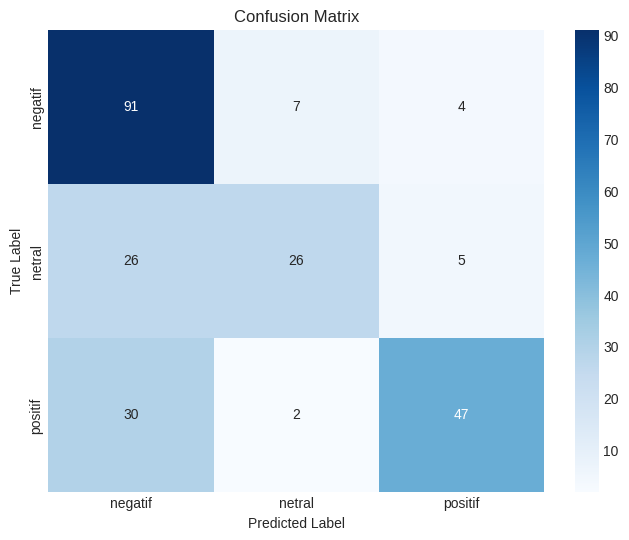

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
# Tampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Untuk Menampilkan Hasil-Hasilnya

In [64]:
# Menampilkan Dataframe Hasil yg kemudian akan diambil untuk dijadika pembanding dengan VADER
hasil_df = pd.DataFrame({
    'text': X_test,
    'actual_label': y_test,
    'predicted_label': y_pred,
    'sentiment_score': skor_sentimen
})
hasil_df.head(30)

,text,actual_label,predicted_label,sentiment_score
328,bmri kin kalo lu lihat pagi nyentuh anjir mau ngejar bbri cok,netral,negatif,-0.748997
986,sentimen negatif danantara tekan sahamsaham bumn saham bbri jatuh level rendah tahun akhir bijak perintah bikin takut investor main aman tak mau ambil risiko maklum urus danantara jejak gelap,negatif,negatif,-0.745491
1130,bbri bulan januari profit turun mending cl gue avg enggak kuat,negatif,negatif,-0.929433
87,siapa mau jadi pacar aku bbri aku lembar saham merah cokk bbri wkwkwkwkwk bbca aadi adro kamu tinggal pilih hadiah anniv,negatif,negatif,-0.521307
1022,bbri bankbank lain enggak ada harga diri anjir wkwkwk,negatif,negatif,-0.858927
474,lu mah mending gue nabung tiap bulan kubeliin saham bbri malah turun terus saham ngentod,negatif,negatif,-0.806406
1068,akumulasi tanggal feb,netral,netral,0.000000
976,apa bbri dik,netral,netral,0.000000
332,we belik kalian bbri,negatif,negatif,-0.263020
373,bbri bmri bang,netral,netral,0.000000


In [62]:
# Menampilkan hasil tf-idf tertinggi

# Ambil fitur (kata) dari TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Dapatkan bobot TF-IDF untuk data latih
tfidf_scores = X_train_tfidf.toarray()

# Buat DataFrame dari bobot TF-IDF dengan nama fitur sebagai kolom
tfidf_df = pd.DataFrame(tfidf_scores, columns=feature_names)

# Hitung rata-rata bobot TF-IDF untuk setiap fitur (kata)
average_tfidf_scores = tfidf_df.mean().sort_values(ascending=False)

# Tampilkan 10 kata dengan rata-rata bobot TF-IDF tertinggi
print("\n10 Kata dengan Rata-rata Bobot TF-IDF Tertinggi:")
print(average_tfidf_scores.head(10))

# Jika Anda ingin melihat TF-IDF tertinggi untuk setiap dokumen (bukan rata-rata)
# Anda bisa iterasi melalui baris tfidf_df
# For example, for the first document:
# print("\nTF-IDF scores for the first document:")
# print(tfidf_df.iloc[0].sort_values(ascending=False).head(10))



10 Kata dengan Rata-rata Bobot TF-IDF Tertinggi:
bbri      0.074189
saham     0.039888
bmri      0.024961
enggak    0.021698
turun     0.020479
bbca      0.018767
gue       0.016302
ihsg      0.015428
jadi      0.015294
bbni      0.015192
dtype: float64


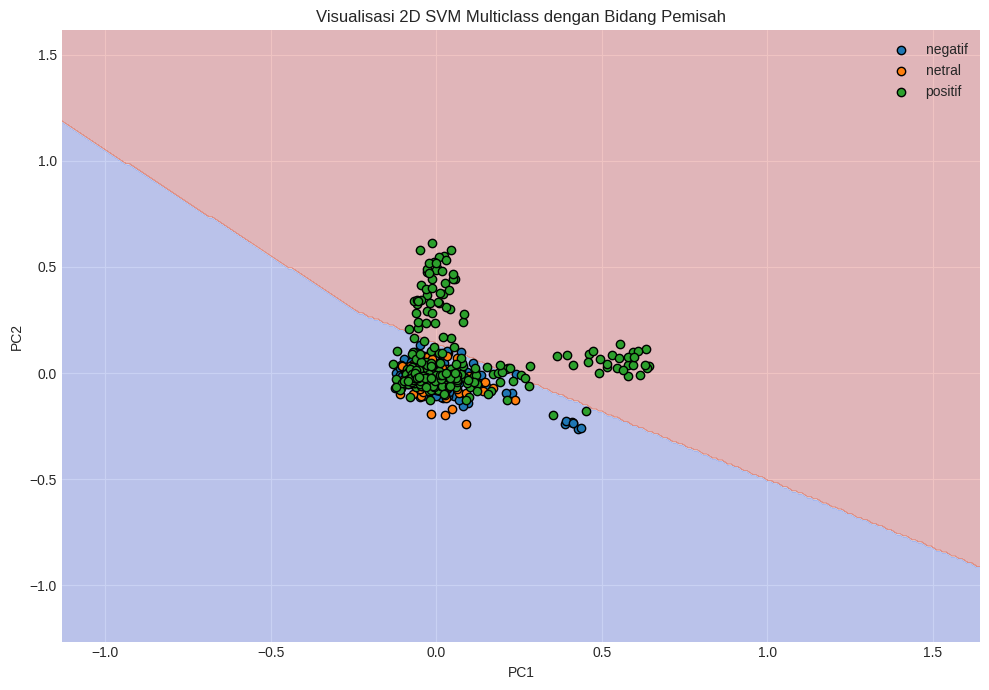

In [73]:
# Menampilkan Dalam Bentuk ruang 2 Dimensi
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# Encode label jika masih berupa string
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Reduksi TF-IDF ke 2D
X_train_array = X_train_tfidf.toarray()
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_array)

# Latih ulang SVM di ruang 2D
svm_2d = SVC(kernel='linear', decision_function_shape='ovr')
svm_2d.fit(X_train_pca, y_train_encoded)

# Buat grid untuk visualisasi bidang
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary dan data
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot titik data
for label in np.unique(y_train_encoded):
    idx = np.where(y_train_encoded == label)
    plt.scatter(X_train_pca[idx, 0], X_train_pca[idx, 1], label=le.inverse_transform([label])[0], edgecolor='k')

plt.title("Visualisasi 2D SVM Multiclass dengan Bidang Pemisah")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()


In [65]:
# Untuk Menggabungkan Dengan Tanggalnya

# Pastikan kolom 'created_at' dalam format datetime
bbri_df_clean['created_at'] = pd.to_datetime(bbri_df_clean['created_at'])

# Reset index hasil_df untuk penggabungan
hasil_df = hasil_df.reset_index(drop=True)

# Gabungkan hasil_df dengan bbri_df_clean berdasarkan index
# Asumsi index hasil_df sesuai dengan sebagian index dari bbri_df_clean setelah split dan drop_duplicates
# Cari index dari X_test di dataframe bbri_df_clean
test_indices = X_test.index

# Ambil baris dari bbri_df_clean berdasarkan index yang ada di X_test
bbri_df_clean_for_merge = bbri_df_clean.loc[test_indices].reset_index(drop=True)

# Gabungkan bbri_df_clean_for_merge dengan hasil_df
hasil_df_with_date = pd.concat([bbri_df_clean_for_merge[['created_at', 'full_text']], hasil_df], axis=1)


display(hasil_df_with_date)

/tmp/ipython-input-65-629779041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbri_df_clean['created_at'] = pd.to_datetime(bbri_df_clean['created_at'])


,created_at,full_text,text,actual_label,predicted_label,sentiment_score
0,2025-02-11 08:34:19+00:00,@okiiinnn BMRI kin kalo lu liat pagi nyentuh 4750 anjir. Mau ngejar BBRI cok,bmri kin kalo lu lihat pagi nyentuh anjir mau ngejar bbri cok,netral,negatif,-0.748997
1,2025-02-26 17:05:23+00:00,@jatamnas SENTIMEN NEGATIF DANANTARA TEKAN SAHAM-SAHAM BUMN: Saham BBRI jatuh ke level terendah dalam 3 tahun terakhir. Kebijakan pemerintah bikin takut para investor main aman tak mau ambil risiko. Maklum yang urus Danantara jejaknya gelap https://t.co/k0hVTL6Z1t,sentimen negatif danantara tekan sahamsaham bumn saham bbri jatuh level rendah tahun akhir bijak perintah bikin takut investor main aman tak mau ambil risiko maklum urus danantara jejak gelap,negatif,negatif,-0.745491
2,2025-02-28 05:16:33+00:00,@newwhiteee @Saham_fess BBRI bulan Januari profit turun 50%. Mending CL aja. Gw avg di 4150 aja gak kuat.,bbri bulan januari profit turun mending cl gue avg enggak kuat,negatif,negatif,-0.929433
3,2025-02-03 15:13:12+00:00,siapa yg mau jadi pacar aku??? bbri aku ada 32.000 lembar saham . tp lagi merah cokk bbri wkwkwkwkwk bbca juga ada aadi adro kamu tinggal pilih sebagai hadiah anniv,siapa mau jadi pacar aku bbri aku lembar saham merah cokk bbri wkwkwkwkwk bbca aadi adro kamu tinggal pilih hadiah anniv,negatif,negatif,-0.521307
4,2025-02-27 05:01:15+00:00,$BBRI dan bank-bank lainnya gada harga dirinya njirrr wkwkwk,bbri bankbank lain enggak ada harga diri anjir wkwkwk,negatif,negatif,-0.858927
...,...,...,...,...,...,...
233,2025-02-27 12:58:40+00:00,Bbca sama bbri gue terjun bebas asu asu,bbca sama bbri gue terjun bebas asu asu,negatif,negatif,-0.651627
234,2025-02-27 05:06:16+00:00,Lama gak buka stockbit makin surem aja BBRI :))),lama enggak buka stockbit makin surem bbri,negatif,negatif,-0.768999
235,2025-02-07 06:40:08+00:00,BBCA BBRI Naik Yang Turun Malah Ini https://t.co/A43Z5YV22Z via @InvestorID,bbca bbri naik turun malah via,positif,negatif,-0.561825
236,2025-02-20 13:04:10+00:00,menyala bbri ku,nyala bbri ku,positif,positif,0.923919


In [74]:
# Merapikan DataFrame

# Pastikan kolom 'created_at' dalam format datetime
hasil_df_with_date['created_at'] = pd.to_datetime(hasil_df_with_date['created_at'])

# Urutkan berdasarkan tanggal dari yang paling lama ke terbaru
hasil_df_sorted_by_date = hasil_df_with_date.sort_values(by='created_at', ascending=True)

display(hasil_df_sorted_by_date)

,created_at,full_text,text,actual_label,predicted_label,sentiment_score
174,2025-02-01 05:39:54+00:00,BBRI Mau Buyback Saham Dananya Triliunan #infosaham #investasi #bri https://t.co/qGdNzlazgD,bbri mau buyback saham dana triliun,positif,positif,0.774418
35,2025-02-02 01:11:40+00:00,Buat yg ahli saham saya ada sisa uang sekian juta kira2 saham apa yg profitable diantara saham berikut : BBRI BBCA BMRI Lain sebetulnya tujuan saya mau average down krn saham yg saya beli taun lalu kemahalan. Advise please !,buat ahli saham sisa uang sekian juta kira saham apa profitable antara saham ikut bbri bbca bmri tuju mau average down saham beli tahun lalu mahal advise please,netral,negatif,-0.390295
151,2025-02-02 10:22:36+00:00,BBRI mengumumkan rencana buyback sahamnya senilai Rp 3 triliun. Rencana ini akan dibahas dalam RUPST 11 Maret 2025. Perkiraan periode buyback 12 Maret 2025 - 11 Maret 2026: Keterbukaan informasi https://t.co/SXcM8Omw0O,bbri umum rencana buyback saham nila rp triliun rencana bahas rupst maret kira periode buyback maret maret buka informasi,positif,positif,0.755065
105,2025-02-02 17:39:54+00:00,@_gagakhitam @Saham_fess Bbkp cut bang lainya tinggal avg down aja klo ada modal bbca bbri cicil tiap bulan. Unv biarin aja wkwk,bbkp cut bang lai tinggal avg down kalo modal bbca bbri cicil tiap bulan unv biar wkwk,positif,negatif,-0.385619
45,2025-02-03 01:11:07+00:00,BRI (BBRI) Siapkan Rp3 T untuk Buyback https://t.co/ymNVHeXdrw,bri bbri siap rp t buyback,positif,positif,0.979630
...,...,...,...,...,...,...
65,2025-02-28 09:53:35+00:00,Kwoakwoa nyangkut di bbri fix 1-2 tahun gabisa di apa apain :),kwoakwoa nyangkut bbri fix tahun enggak bisa apa apa,negatif,negatif,-0.386994
155,2025-02-28 10:03:49+00:00,@Al3xa3rd Gapapa hold aja bang IHSG emang lagi trend turun BBRI serok lagi aja,gapapa hold bang ihsg memang trend turun bbri serok,positif,negatif,-0.430719
183,2025-02-28 10:16:31+00:00,bbri udh jatoh malah nyungsep hr ini,bbri jatuh malah nyungsep hari,negatif,negatif,-0.941029
99,2025-02-28 18:53:51+00:00,Lihat dimana ya tadi.. kalau saham bbca bbri sama ada saham yg biasa nilai pasarnya tinggi malah meeosot jauh,lihat tadi kalau saham bbca bbri sama saham biasa nilai pasar tinggi malah meeosot jauh,negatif,negatif,-0.329934


In [67]:
# Melihat Sebaran Data

# Pastikan kolom 'created_at' dalam format datetime
hasil_df_sorted_by_date['created_at'] = pd.to_datetime(hasil_df_sorted_by_date['created_at'])

# Hitung jumlah tweet per tanggal
jumlah_per_tanggal = hasil_df_sorted_by_date['created_at'].dt.date.value_counts().sort_index()

# Tampilkan hasil
print("Jumlah tweet per hari:")
print(jumlah_per_tanggal)


Jumlah tweet per hari:
created_at
2025-02-01     1
2025-02-02     3
2025-02-03    13
2025-02-04     7
2025-02-05     8
2025-02-06     6
2025-02-07     8
2025-02-08     3
2025-02-09     2
2025-02-10     8
2025-02-11    12
2025-02-12     9
2025-02-13     5
2025-02-14    12
2025-02-15     2
2025-02-16     2
2025-02-17    11
2025-02-18     8
2025-02-19     8
2025-02-20    23
2025-02-21     7
2025-02-22     2
2025-02-23     2
2025-02-24    12
2025-02-25    13
2025-02-26     7
2025-02-27    23
2025-02-28    21
Name: count, dtype: int64


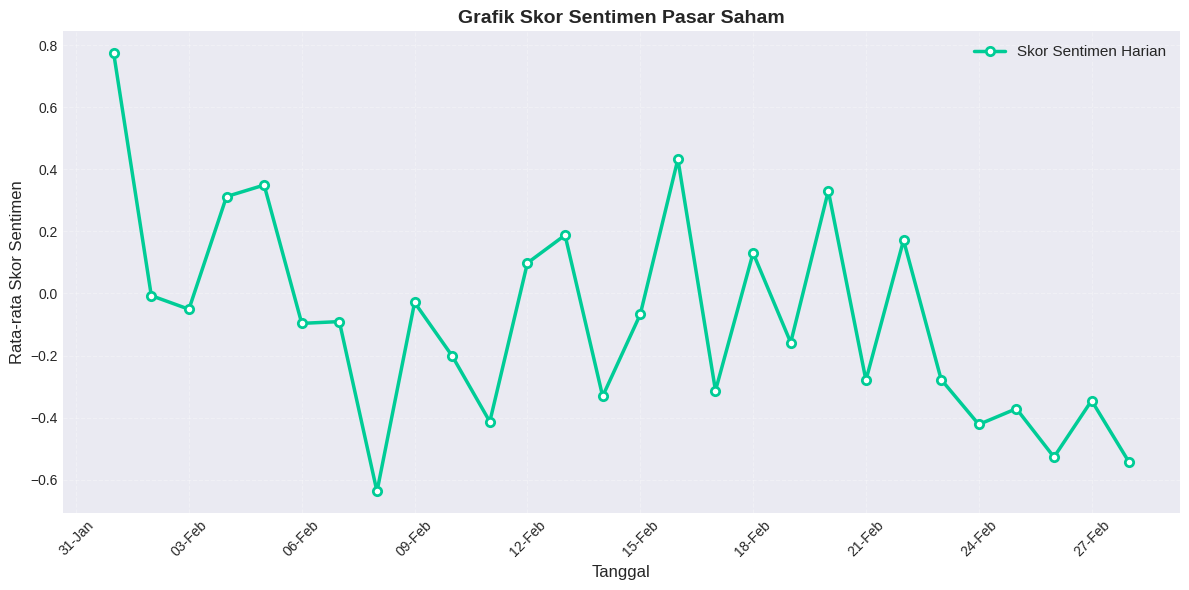

In [68]:
# Menampilkan Plot dari Rata-rata skor

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Gaya visual mirip grafik saham
plt.style.use('seaborn-v0_8-darkgrid')  # alternatif: 'ggplot', 'seaborn-whitegrid', atau 'fivethirtyeight'

# Pastikan tanggal dalam format datetime dan sudah terurut
hasil_df_sorted_by_date['created_at'] = pd.to_datetime(hasil_df_sorted_by_date['created_at'])
daily_avg = hasil_df_sorted_by_date.groupby(hasil_df_sorted_by_date['created_at'].dt.date)['sentiment_score'].mean().reset_index()
daily_avg.columns = ['tanggal', 'rata2_score']

# Buat plot garis
plt.figure(figsize=(12, 6))
plt.plot(
    daily_avg['tanggal'],
    daily_avg['rata2_score'],
    color='#00cc96',  # warna hijau segar seperti chart saham
    linewidth=2.5,
    marker='o',
    markersize=6,
    markerfacecolor='white',
    markeredgewidth=2,
    label='Skor Sentimen Harian'
)

# Format tanggal agar ringkas dan tidak padat
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

# Estetika sumbu dan label
plt.title('Grafik Skor Sentimen Pasar Saham', fontsize=14, fontweight='bold')
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Rata-rata Skor Sentimen', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()



# Menyimpan Data AKhirnya

In [69]:
# Menyimpan Hasil AKhir dan akan dipakai untuk VADER

# Hapus kolom 'full_text'
hasil_df_sorted_by_date = hasil_df_sorted_by_date.drop(columns=['full_text'])

# Simpan DataFrame yang sudah diperbarui ke file CSV
hasil_df_sorted_by_date.to_csv('/content/drive/MyDrive/Folder skripsi/Script/hasil_sentimen_sorted.csv', index=False)

print("DataFrame 'hasil_df_sorted_by_date' dengan kolom 'full_text' dihapus telah disimpan ke '/content/drive/MyDrive/Folder skripsi/Script/hasil_sentimen_sorted.csv'")
display(hasil_df_sorted_by_date.head()) # Tampilkan beberapa baris untuk verifikasi

DataFrame 'hasil_df_sorted_by_date' dengan kolom 'full_text' dihapus telah disimpan ke '/content/drive/MyDrive/Folder skripsi/Script/hasil_sentimen_sorted.csv'


,created_at,text,actual_label,predicted_label,sentiment_score
174,2025-02-01 05:39:54+00:00,bbri mau buyback saham dana triliun,positif,positif,0.774418
35,2025-02-02 01:11:40+00:00,buat ahli saham sisa uang sekian juta kira saham apa profitable antara saham ikut bbri bbca bmri tuju mau average down saham beli tahun lalu mahal advise please,netral,negatif,-0.390295
151,2025-02-02 10:22:36+00:00,bbri umum rencana buyback saham nila rp triliun rencana bahas rupst maret kira periode buyback maret maret buka informasi,positif,positif,0.755065
105,2025-02-02 17:39:54+00:00,bbkp cut bang lai tinggal avg down kalo modal bbca bbri cicil tiap bulan unv biar wkwk,positif,negatif,-0.385619
45,2025-02-03 01:11:07+00:00,bri bbri siap rp t buyback,positif,positif,0.979630
